In [1]:
# Install the Prophet
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [3]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Store the NASDAQ data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
df_nasdaq = pd.read_csv(
    "~/project_1/Resources/NASDAQ_Comp_HistoricalData_1715050466921.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
df_nasdaq = df_nasdaq.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(df_nasdaq.head())
display(df_nasdaq.tail())

,Close/Last,Open,High,Low
Date,,,,
2014-05-06,4080.76,4128.22,4132.46,4080.76
2014-05-07,4067.67,4085.49,4091.03,4021.05
2014-05-08,4051.50,4053.28,4109.20,4039.91
2014-05-09,4071.87,4043.44,4071.87,4025.24
2014-05-12,4143.86,4092.84,4146.54,4092.09


,Close/Last,Open,High,Low
Date,,,,
2024-04-29,15983.08,16007.00,16021.49,15885.89
2024-04-30,15657.82,15920.89,15979.36,15655.67
2024-05-01,15605.48,15646.09,15926.22,15557.64
2024-05-02,15840.96,15758.11,15862.79,15604.73
2024-05-03,16156.33,16147.48,16204.71,16068.34


In [5]:
# Rename close column name
df_nasdaq.rename(columns={'Close/Last': 'NASDAQ Close'}, inplace=True)

In [6]:
# Create new df with just Close prices
df_nasdaq_close = df_nasdaq['NASDAQ Close']

<Axes: xlabel='Date'>

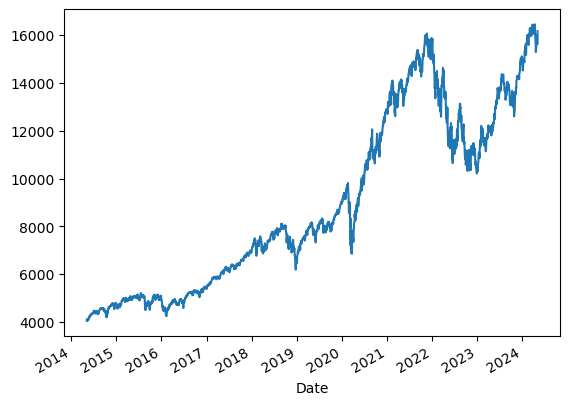

In [7]:
# Plot NASDAQ Close
df_nasdaq_close.plot()

In [8]:
# Store the S&P 500 data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
df_sp500 = pd.read_csv(
    "~/project_1/Resources/SP500_HistoricalData_1715050201148.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
df_sp500 = df_sp500.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(df_sp500.head())
display(df_sp500.tail())

,Close/Last,Open,High,Low
Date,,,,
2014-05-06,1867.72,1883.69,1883.69,1867.72
2014-05-07,1878.21,1868.53,1878.83,1859.79
2014-05-08,1875.63,1877.39,1889.07,1870.05
2014-05-09,1878.48,1875.27,1878.57,1867.02
2014-05-12,1896.65,1880.03,1897.13,1880.03


,Close/Last,Open,High,Low
Date,,,,
2024-04-29,5116.17,5114.13,5123.49,5088.65
2024-04-30,5035.69,5103.78,5110.83,5035.31
2024-05-01,5018.39,5029.03,5096.12,5013.45
2024-05-02,5064.20,5049.32,5073.21,5011.05
2024-05-03,5127.79,5122.78,5139.12,5101.22


In [9]:
# Rename close column name
df_sp500.rename(columns={'Close/Last': 'SP500 Close'}, inplace=True)

In [10]:
# Create new df with just Close prices
df_sp500_close = df_sp500['SP500 Close']

<Axes: xlabel='Date'>

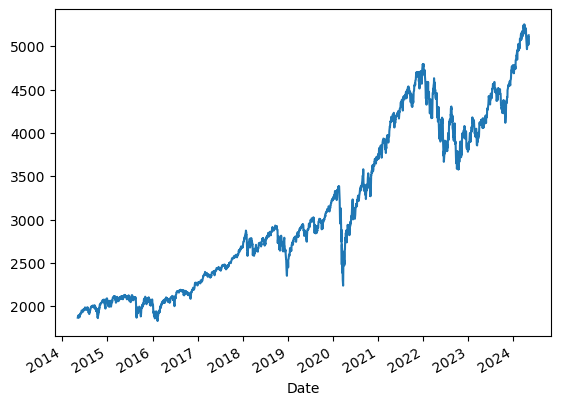

In [11]:
# Plot S&P 500 Close
df_sp500_close.plot()

In [12]:
# Concat NASDAQ and S&P 500 close dataframes
df_nasdaq_sp500_close = pd.concat([df_nasdaq_close, df_sp500_close], axis=1)

In [13]:
# Review the first and last five rows of the DataFrame
display(df_nasdaq_sp500_close.head())
display(df_nasdaq_sp500_close.tail())

,NASDAQ Close,SP500 Close
Date,,
2014-05-06,4080.76,1867.72
2014-05-07,4067.67,1878.21
2014-05-08,4051.50,1875.63
2014-05-09,4071.87,1878.48
2014-05-12,4143.86,1896.65


,NASDAQ Close,SP500 Close
Date,,
2024-04-29,15983.08,5116.17
2024-04-30,15657.82,5035.69
2024-05-01,15605.48,5018.39
2024-05-02,15840.96,5064.20
2024-05-03,16156.33,5127.79


In [14]:
# Calculate correlations for NASDAQ and SP500
df_nasdaq_sp500_close.corr()

,NASDAQ Close,SP500 Close
NASDAQ Close,1.000000,0.988605
SP500 Close,0.988605,1.000000


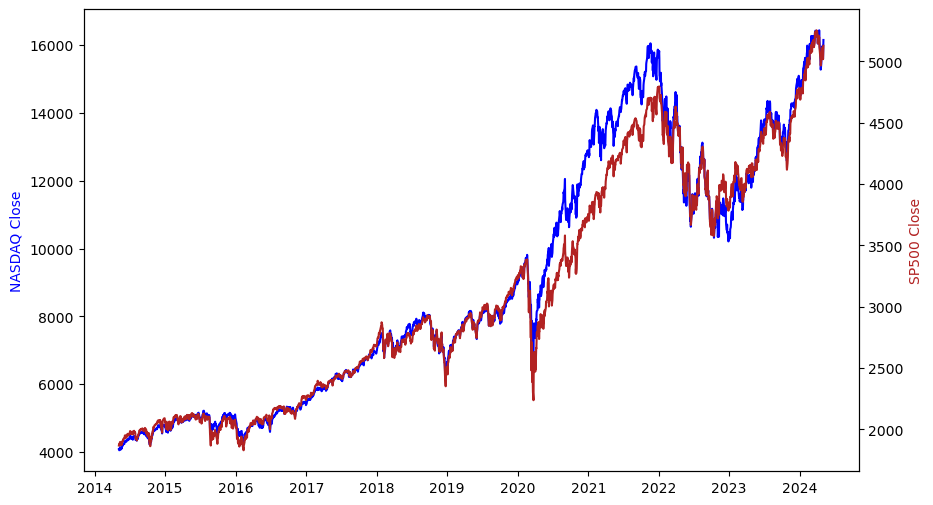

In [71]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Historical NASDAQ and SP500 data.
ax1.plot(df_nasdaq_sp500_close['NASDAQ Close'], label='NASDAQ', color='blue')
ax1.set_ylabel('NASDAQ Close', color='blue')

ax2 = ax1.twinx()
ax2.plot(df_nasdaq_sp500_close['SP500 Close'], label='S&P500', color='firebrick')
ax2.set_ylabel('SP500 Close', color='firebrick')

plt.savefig("NASDAQ_SP500_History")

In [17]:
# Create a column that contains the SP500 daily return data
# Use the pct_change function to calculate the daily return values
df_nasdaq_sp500_close['NASDAQ Daily Return'] = df_nasdaq_sp500_close['NASDAQ Close'].pct_change()

In [18]:
df_nasdaq_sp500_close

,NASDAQ Close,SP500 Close,NASDAQ Daily Return
Date,,,
2014-05-06,4080.76,1867.72,NaN
2014-05-07,4067.67,1878.21,-0.003208
2014-05-08,4051.50,1875.63,-0.003975
2014-05-09,4071.87,1878.48,0.005028
2014-05-12,4143.86,1896.65,0.017680
...,...,...,...
2024-04-29,15983.08,5116.17,0.003464
2024-04-30,15657.82,5035.69,-0.020350
2024-05-01,15605.48,5018.39,-0.003343


In [19]:
# Create new df with just NASDAQ Daily Return
df_nasdaq_daily_return = df_nasdaq_sp500_close['NASDAQ Daily Return']
df_nasdaq_daily_return

Date
2014-05-06         NaN
2014-05-07   -0.003208
2014-05-08   -0.003975
2014-05-09    0.005028
2014-05-12    0.017680
                ...   
2024-04-29    0.003464
2024-04-30   -0.020350
2024-05-01   -0.003343
2024-05-02    0.015090
2024-05-03    0.019909
Name: NASDAQ Daily Return, Length: 2531, dtype: float64

<Axes: xlabel='Date'>

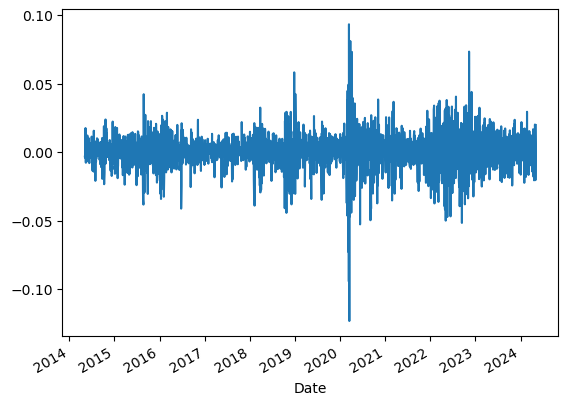

In [20]:
# Plot NASDAQ daily returns
df_nasdaq_daily_return.plot()

In [21]:
# Calculate average day of the week return
nasdaq_dow_return_grouped_mean = df_nasdaq_daily_return.groupby([df_nasdaq_daily_return.index.isocalendar().day])
nasdaq_dow_return_mean = nasdaq_dow_return_grouped_mean.mean()
nasdaq_dow_return_mean

day
1    0.000607
2    0.000674
3    0.000962
4    0.000408
5    0.000502
Name: NASDAQ Daily Return, dtype: float64

<Axes: xlabel='day'>

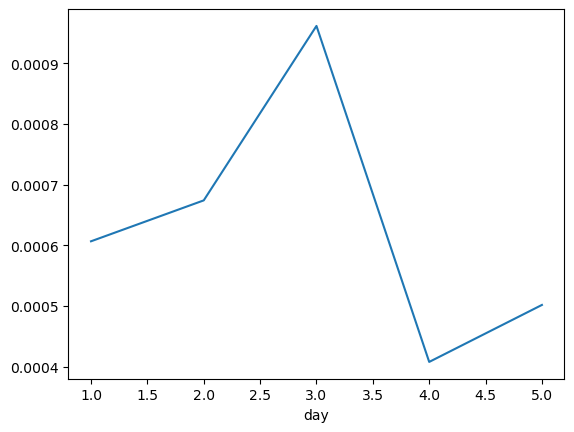

In [22]:
# Plot NASDAQ average day of week returns
nasdaq_dow_return_mean.plot()

In [23]:
# Calculate average day of the month return
nasdaq_dom_return_grouped_mean = df_nasdaq_daily_return.groupby([df_nasdaq_daily_return.index.day])
nasdaq_dom_return_mean = nasdaq_dom_return_grouped_mean.mean()
nasdaq_dom_return_mean

Date
1     0.002270
2     0.002085
3    -0.001571
4     0.002487
5    -0.000463
6     0.001003
7     0.000865
8     0.000768
9    -0.001225
10    0.001108
11   -0.001071
12    0.001054
13    0.000746
14    0.001204
15    0.002341
16    0.000252
17    0.001016
18    0.000027
19   -0.000428
20   -0.000270
21   -0.000024
22    0.000889
23    0.000439
24    0.000463
25    0.000370
26    0.002092
27   -0.000437
28    0.001689
29    0.001412
30    0.000380
31    0.000081
Name: NASDAQ Daily Return, dtype: float64

<Axes: xlabel='Date'>

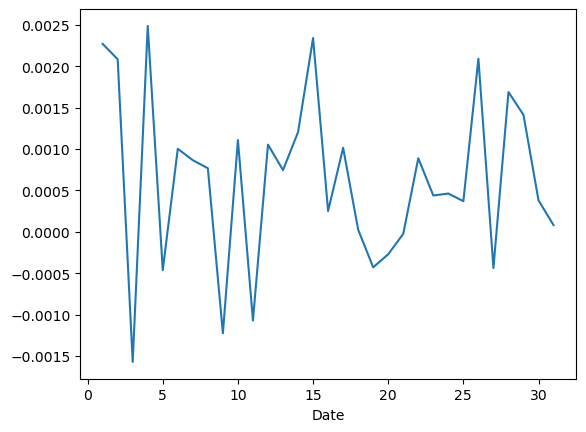

In [24]:
# Plot NASDAQ average day of month returns
nasdaq_dom_return_mean.plot()

In [25]:
# Calculate average week of the year return
nasdaq_woy_return_grouped_mean = df_nasdaq_daily_return.groupby([df_nasdaq_daily_return.index.isocalendar().week])
nasdaq_woy_return_mean = nasdaq_woy_return_grouped_mean.mean()
nasdaq_woy_return_mean

week
1    -0.001132
2     0.002034
3     0.001325
4     0.001786
5     0.000215
6     0.000394
7     0.003036
8    -0.000425
9    -0.001624
10   -0.000868
11    0.001421
12   -0.002465
13    0.004138
14   -0.001116
15    0.003167
16   -0.000701
17    0.001121
18   -0.000317
19    0.000070
20   -0.000214
21    0.004432
22    0.001264
23    0.000822
24   -0.001049
25    0.003510
26   -0.000646
27    0.003719
28    0.001782
29    0.002105
30    0.000926
31    0.000096
32    0.000199
33   -0.001016
34   -0.000332
35    0.003109
36   -0.002287
37   -0.000345
38   -0.001804
39   -0.001842
40    0.000466
41   -0.000478
42    0.001186
43    0.001512
44    0.000891
45    0.005155
46   -0.000164
47    0.000197
48    0.001877
49    0.000196
50   -0.001770
51    0.000436
52    0.001476
53   -0.000180
Name: NASDAQ Daily Return, dtype: float64

<Axes: xlabel='week'>

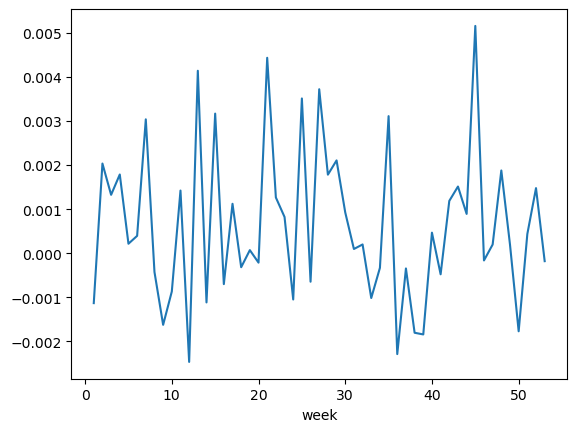

In [26]:
# Plot NASDAQ average week of year returns
nasdaq_woy_return_mean.plot()

In [27]:
# Create a column that contains the SP500 daily return data
# Use the pct_change function to calculate the daily return values
df_nasdaq_sp500_close['SP 500 Daily Return'] = df_nasdaq_sp500_close['SP500 Close'].pct_change()

In [28]:
df_nasdaq_sp500_close

,NASDAQ Close,SP500 Close,NASDAQ Daily Return,SP 500 Daily Return
Date,,,,
2014-05-06,4080.76,1867.72,NaN,NaN
2014-05-07,4067.67,1878.21,-0.003208,0.005616
2014-05-08,4051.50,1875.63,-0.003975,-0.001374
2014-05-09,4071.87,1878.48,0.005028,0.001519
2014-05-12,4143.86,1896.65,0.017680,0.009673
...,...,...,...,...
2024-04-29,15983.08,5116.17,0.003464,0.003178
2024-04-30,15657.82,5035.69,-0.020350,-0.015731
2024-05-01,15605.48,5018.39,-0.003343,-0.003435


In [29]:
correlation = df_nasdaq_sp500_close['NASDAQ Daily Return'].corr(df_nasdaq_sp500_close['SP 500 Daily Return'])
correlation

0.946865264106944

In [30]:
df_nasdaq_sp500_close.corr()

,NASDAQ Close,SP500 Close,NASDAQ Daily Return,SP 500 Daily Return
NASDAQ Close,1.000000,0.988605,0.016092,0.024118
SP500 Close,0.988605,1.000000,0.012459,0.022396
NASDAQ Daily Return,0.016092,0.012459,1.000000,0.946865
SP 500 Daily Return,0.024118,0.022396,0.946865,1.000000


In [31]:
# Create new df with just S&P 500 Daily Return
df_sp500_daily_return = df_nasdaq_sp500_close['SP 500 Daily Return']
df_sp500_daily_return

Date
2014-05-06         NaN
2014-05-07    0.005616
2014-05-08   -0.001374
2014-05-09    0.001519
2014-05-12    0.009673
                ...   
2024-04-29    0.003178
2024-04-30   -0.015731
2024-05-01   -0.003435
2024-05-02    0.009128
2024-05-03    0.012557
Name: SP 500 Daily Return, Length: 2531, dtype: float64

<Axes: xlabel='Date'>

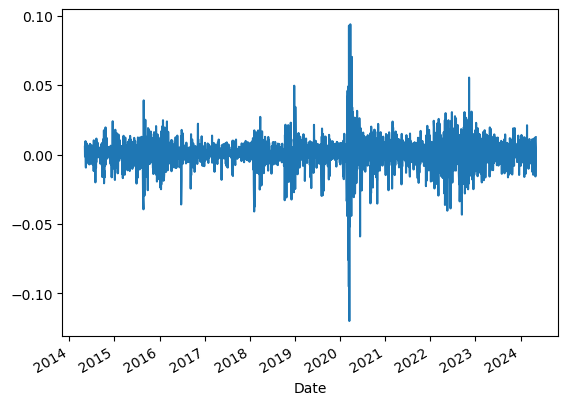

In [32]:
# Plot S&P 500 daily returns
df_sp500_daily_return.plot()

In [33]:
# Calculate average day of the week return
SP500_dow_return_grouped_mean = df_sp500_daily_return.groupby([df_sp500_daily_return.index.isocalendar().day])
SP500_dow_return_mean = SP500_dow_return_grouped_mean.mean()
SP500_dow_return_mean

day
1    0.000300
2    0.000457
3    0.000666
4    0.000288
5    0.000583
Name: SP 500 Daily Return, dtype: float64

<Axes: xlabel='day'>

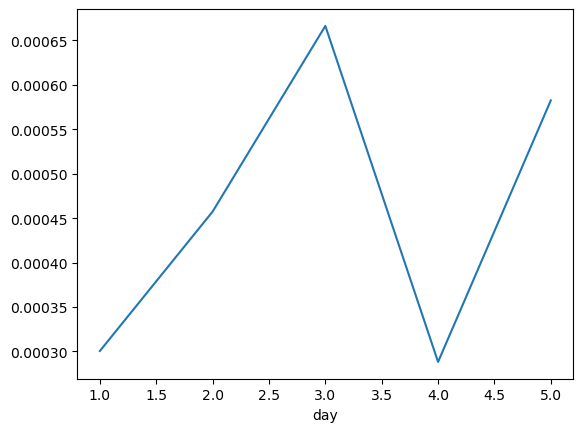

In [34]:
# Plot S&P 500 average day of week returns
SP500_dow_return_mean.plot()

In [35]:
# Calculate average day of the month return
SP500_dom_return_grouped_mean = df_sp500_daily_return.groupby([df_sp500_daily_return.index.day])
SP500_dom_return_mean = SP500_dom_return_grouped_mean.mean()
SP500_dom_return_mean

Date
1     0.001335
2     0.002135
3    -0.000111
4     0.002169
5     0.000082
6     0.001060
7     0.000698
8     0.001027
9    -0.001293
10    0.001403
11   -0.001738
12    0.000535
13    0.000235
14    0.000674
15    0.001833
16    0.000482
17    0.000687
18   -0.000302
19   -0.000791
20   -0.000932
21    0.000297
22    0.000545
23   -0.000156
24    0.000389
25    0.000603
26    0.001585
27   -0.000347
28    0.001327
29    0.001478
30    0.000371
31   -0.001573
Name: SP 500 Daily Return, dtype: float64

<Axes: xlabel='Date'>

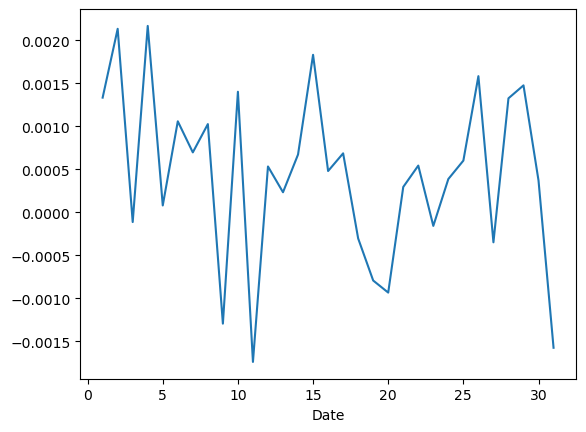

In [36]:
# Plot S&P 500 average day of month returns
SP500_dom_return_mean.plot()

In [37]:
# Calculate average week of the year return
SP500_woy_return_grouped_mean = df_sp500_daily_return.groupby([df_sp500_daily_return.index.isocalendar().week])
SP500_woy_return_mean = SP500_woy_return_grouped_mean.mean()
SP500_woy_return_mean

week
1    -0.000362
2     0.000982
3     0.000559
4     0.001334
5    -0.000198
6     0.000169
7     0.002439
8     0.000064
9    -0.001617
10   -0.000745
11    0.000245
12   -0.002909
13    0.004080
14   -0.000406
15    0.003170
16   -0.000423
17    0.000474
18    0.000120
19   -0.000040
20   -0.001007
21    0.003076
22    0.000818
23    0.001344
24   -0.002223
25    0.002415
26   -0.000103
27    0.002325
28    0.001318
29    0.001874
30    0.000913
31   -0.000505
32    0.000633
33   -0.000469
34   -0.001122
35    0.002076
36   -0.001641
37   -0.000555
38   -0.001005
39   -0.001961
40    0.000809
41    0.000085
42    0.001183
43    0.001035
44    0.000751
45    0.004447
46    0.000144
47    0.000494
48    0.002000
49    0.000352
50   -0.001904
51    0.000447
52    0.001537
53    0.000762
Name: SP 500 Daily Return, dtype: float64

<Axes: xlabel='week'>

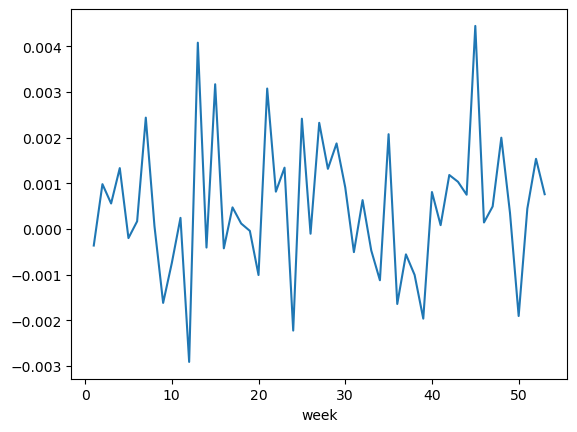

In [38]:
# Plot S&P 500 average week of year returns
SP500_woy_return_mean.plot()

In [39]:
## Create a NASDAQ Time Series Model with Prophet

In [40]:
# Using the nasdaq DataFrame, reset the index so the date information is no longer the index
df_nasdaq_close = df_nasdaq_close.reset_index()

In [41]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_nasdaq_close.rename(columns={'Date':'ds','NASDAQ Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_nasdaq_close.dropna()

# View the first and last five rows of the NASDAQ DataFrame
df_nasdaq_close

,ds,y
0,2014-05-06,4080.76
1,2014-05-07,4067.67
2,2014-05-08,4051.50
3,2014-05-09,4071.87
4,2014-05-12,4143.86
...,...,...
2526,2024-04-29,15983.08
2527,2024-04-30,15657.82
2528,2024-05-01,15605.48
2529,2024-05-02,15840.96


In [42]:
# Call the Prophet function, store as an object
nasdaq_model = Prophet()

In [43]:
# Fit the time-series model.
nasdaq_model.fit(df_nasdaq_close)

19:24:57 - cmdstanpy - INFO - Chain [1] start processing
19:24:57 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
# Create a future dataframe to hold predictions
# Make the prediction go out 90 days
nasdaq_future = nasdaq_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the nasdaq_forecast DataFrame
nasdaq_future.tail(5)

,ds
2616,2024-07-28
2617,2024-07-29
2618,2024-07-30
2619,2024-07-31
2620,2024-08-01


In [45]:
# Make the predictions for the NASDAQ data using the DataFrame
nasdaq_forecast = nasdaq_model.predict(nasdaq_future)

# Display the first five rows of the nasdaq_forecast DataFrame
nasdaq_forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-05-06,4227.848655,3590.566497,4880.685457,4227.848655,4227.848655,15.683605,15.683605,15.683605,46.006231,46.006231,46.006231,-30.322626,-30.322626,-30.322626,0.0,0.0,0.0,4243.532260
1,2014-05-07,4229.717953,3538.224432,4832.646940,4229.717953,4229.717953,0.629007,0.629007,0.629007,44.185011,44.185011,44.185011,-43.556004,-43.556004,-43.556004,0.0,0.0,0.0,4230.346960
2,2014-05-08,4231.587251,3610.332526,4900.501817,4231.587251,4231.587251,-9.525703,-9.525703,-9.525703,46.384120,46.384120,46.384120,-55.909824,-55.909824,-55.909824,0.0,0.0,0.0,4222.061547
3,2014-05-09,4233.456549,3543.913652,4848.647472,4233.456549,4233.456549,-23.938061,-23.938061,-23.938061,43.295938,43.295938,43.295938,-67.233999,-67.233999,-67.233999,0.0,0.0,0.0,4209.518488
4,2014-05-12,4239.064443,3518.803699,4858.660632,4239.064443,4239.064443,-49.777970,-49.777970,-49.777970,43.954481,43.954481,43.954481,-93.732452,-93.732452,-93.732452,0.0,0.0,0.0,4189.286472


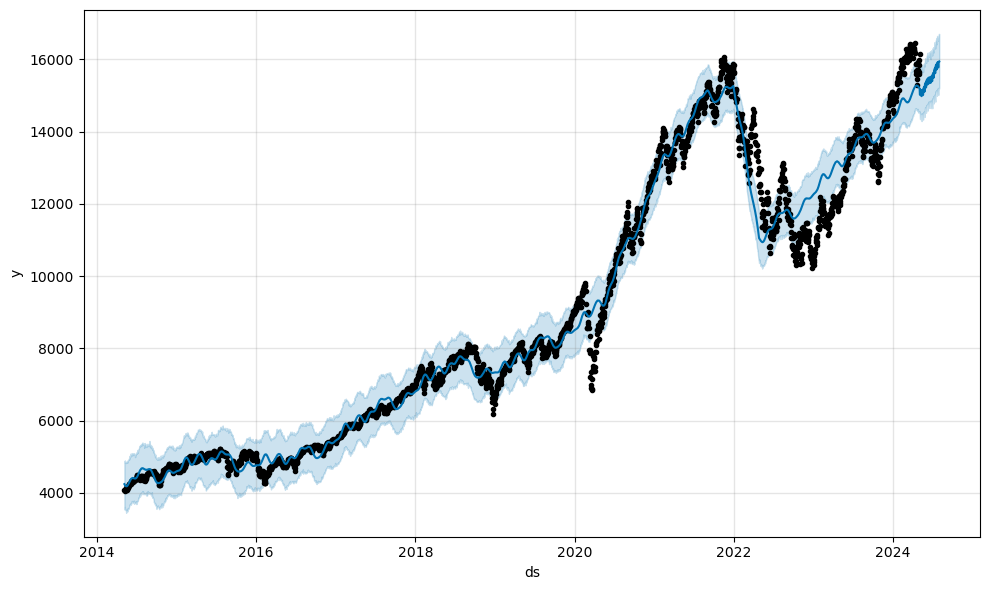

In [46]:
# Plot the Prophet predictions for the NASDAQ data
fig1 = nasdaq_model.plot(nasdaq_forecast)

In [47]:
# Set the index in the nasdaq_forecast DataFrame to the ds datetime column
nasdaq_forecast = nasdaq_forecast.set_index('ds')

In [48]:
# View only the yhat,yhat_lower and yhat_upper columns from the nasdaq_forecast DataFrame
nasdaq_forecast[['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
ds,,,
2014-05-06,4243.532260,3590.566497,4880.685457
2014-05-07,4230.346960,3538.224432,4832.646940
2014-05-08,4222.061547,3610.332526,4900.501817
2014-05-09,4209.518488,3543.913652,4848.647472
2014-05-12,4189.286472,3518.803699,4858.660632
...,...,...,...
2024-07-28,15776.756584,15014.007709,16520.681858
2024-07-29,15935.260963,15216.915685,16672.290477
2024-07-30,15939.194218,15180.044534,16702.783851


<Axes: xlabel='ds'>

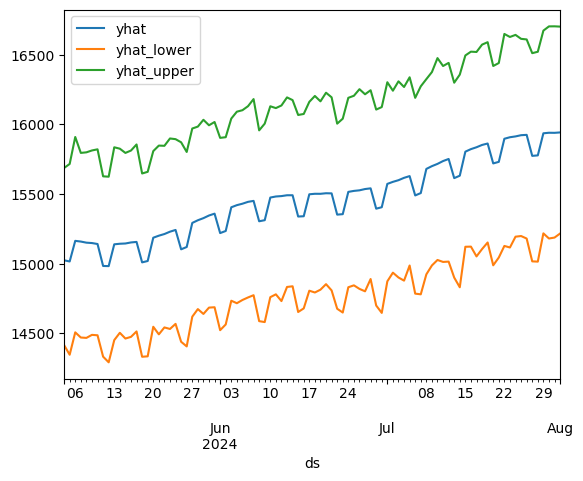

In [49]:
# From the nasdaq_forecast DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 90 days
nasdaq_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:].plot()

In [50]:
# Reset the index in the nasdaq_forecast DataFrame
nasdaq_forecast = nasdaq_forecast.reset_index()

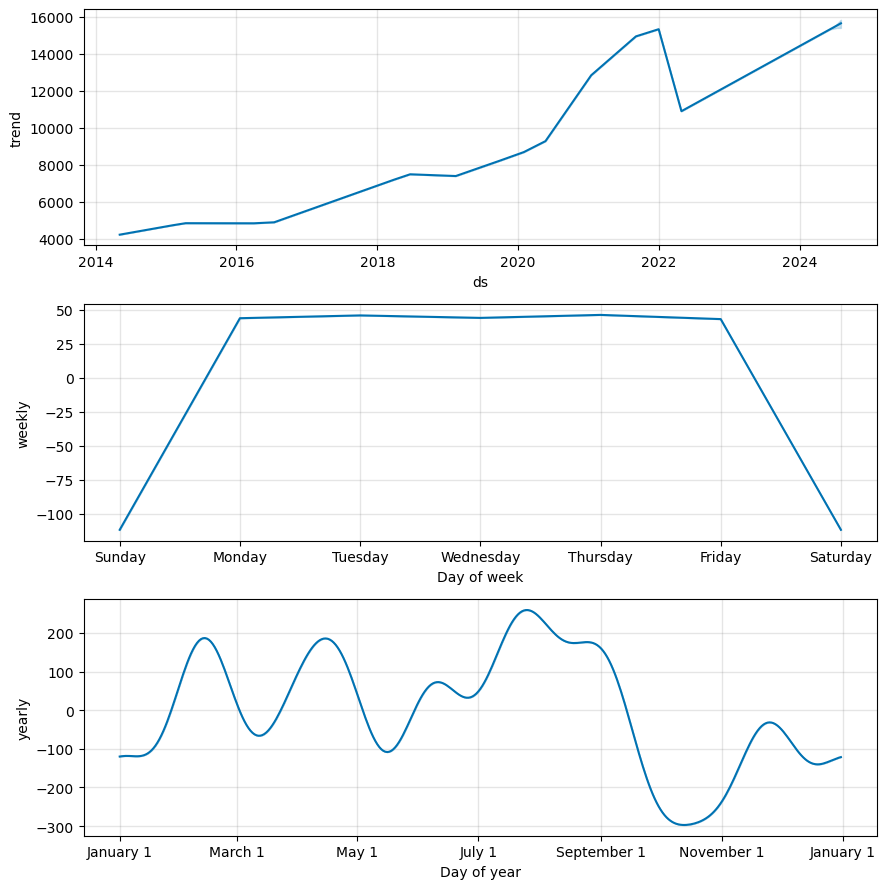

In [51]:
# Use the plot_components function to visualize the forecast results
# for the nasdaq_forecast DataFrame
fig2 = nasdaq_model.plot_components(nasdaq_forecast)
plt.savefig("NASDAQ_components")

In [52]:
## Create a S&P 500 Time Series Model with Prophet

In [53]:
# Using the nasdaq DataFrame, reset the index so the date information is no longer the index
df_sp500_close = df_sp500_close.reset_index()

In [54]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_sp500_close.rename(columns={'Date':'ds','SP500 Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_sp500_close.dropna()

# View the first and last five rows of the SP500 DataFrame
df_sp500_close

,ds,y
0,2014-05-06,1867.72
1,2014-05-07,1878.21
2,2014-05-08,1875.63
3,2014-05-09,1878.48
4,2014-05-12,1896.65
...,...,...
2526,2024-04-29,5116.17
2527,2024-04-30,5035.69
2528,2024-05-01,5018.39
2529,2024-05-02,5064.20


In [55]:
# Call the Prophet function, store as an object
sp500_model = Prophet()

In [56]:
# Fit the time-series model.
sp500_model.fit(df_sp500_close)

19:24:59 - cmdstanpy - INFO - Chain [1] start processing
19:25:00 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
# Create a future dataframe to hold predictions
# Make the prediction go out 90 days
sp500_future = sp500_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the sp500_future DataFrame
sp500_future.tail(5)

,ds
2616,2024-07-28
2617,2024-07-29
2618,2024-07-30
2619,2024-07-31
2620,2024-08-01


In [58]:
# Make the predictions for the sp500 data using the DataFrame
sp500_forecast = sp500_model.predict(sp500_future)

# Display the first five rows of the sp500_forecast DataFrame
sp500_forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-05-06,1924.237548,1773.251810,2123.933254,1924.237548,1924.237548,18.851041,18.851041,18.851041,15.653661,15.653661,15.653661,3.197380,3.197380,3.197380,0.0,0.0,0.0,1943.088590
1,2014-05-07,1924.642949,1771.804939,2114.519635,1924.642949,1924.642949,13.641521,13.641521,13.641521,14.656003,14.656003,14.656003,-1.014482,-1.014482,-1.014482,0.0,0.0,0.0,1938.284471
2,2014-05-08,1925.048351,1758.922502,2105.828276,1925.048351,1925.048351,10.441046,10.441046,10.441046,15.387564,15.387564,15.387564,-4.946518,-4.946518,-4.946518,0.0,0.0,0.0,1935.489396
3,2014-05-09,1925.453752,1756.690458,2117.290159,1925.453752,1925.453752,7.191051,7.191051,7.191051,15.742866,15.742866,15.742866,-8.551815,-8.551815,-8.551815,0.0,0.0,0.0,1932.644803
4,2014-05-12,1926.669955,1754.503423,2106.198765,1926.669955,1926.669955,-2.020279,-2.020279,-2.020279,14.999513,14.999513,14.999513,-17.019792,-17.019792,-17.019792,0.0,0.0,0.0,1924.649676


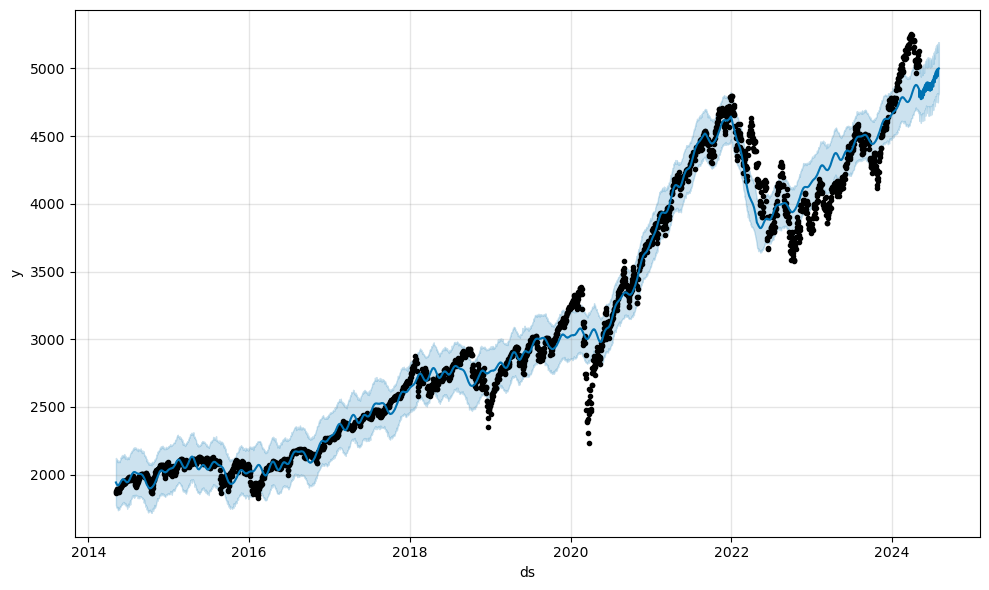

In [59]:
# Plot the Prophet predictions for the sp500
fig3 = sp500_model.plot(sp500_forecast)

In [60]:
# Set the index in the sp500_forecast DataFrame to the ds datetime column
sp500_forecast = sp500_forecast.set_index('ds')

In [61]:
# View only the yhat,yhat_lower and yhat_upper columns from the sp500_forecast DataFrame
sp500_forecast[['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
ds,,,
2014-05-06,1943.088590,1773.251810,2123.933254
2014-05-07,1938.284471,1771.804939,2114.519635
2014-05-08,1935.489396,1758.922502,2105.828276
2014-05-09,1932.644803,1756.690458,2117.290159
2014-05-12,1924.649676,1754.503423,2106.198765
...,...,...,...
2024-07-28,4943.197939,4755.482490,5126.003668
2024-07-29,4997.343606,4812.171220,5177.601707
2024-07-30,4998.712599,4812.918466,5193.833962


<Axes: xlabel='ds'>

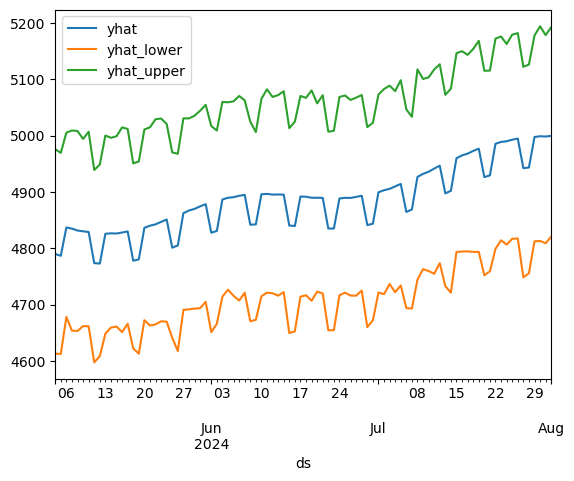

In [62]:
# From the sp500_forecast DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 90 days
sp500_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:].plot()

In [63]:
# Reset the index in the sp500_forecast DataFrame
sp500_forecast = sp500_forecast.reset_index()

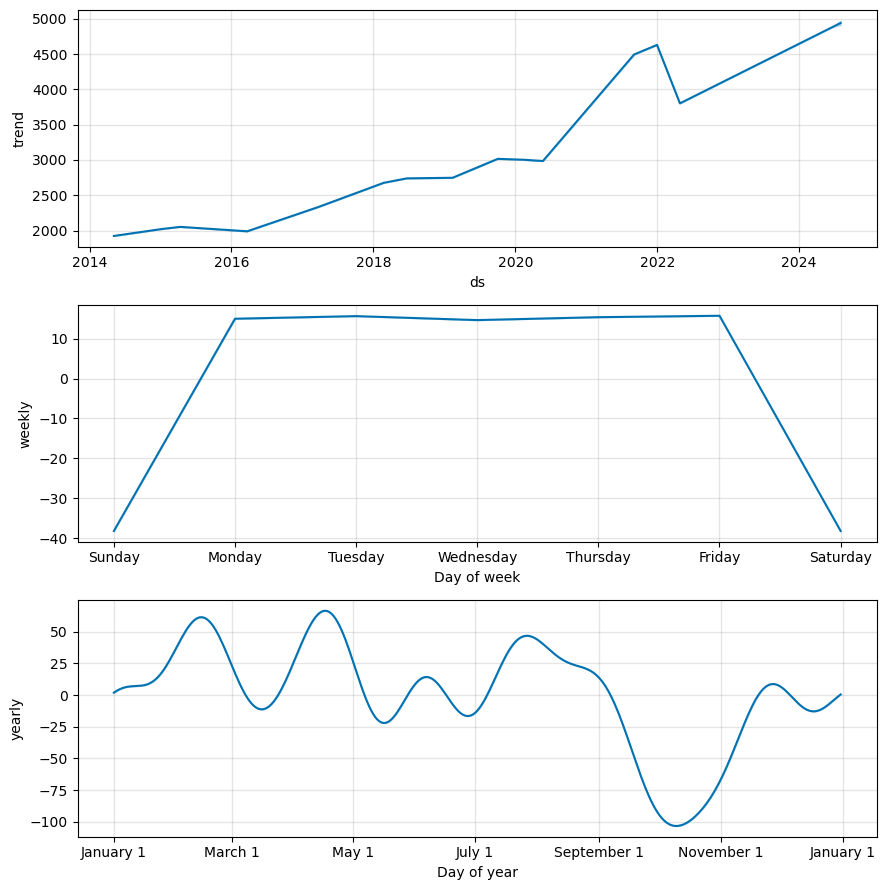

In [64]:
# Use the plot_components function to visualize the forecast results
# for the sp500_forecast DataFrame
fig4 = sp500_model.plot_components(sp500_forecast)
plt.savefig("SP500_components")

In [65]:
# Set 'ds' column as the index
sp500_forecast_indexed = sp500_forecast.set_index('ds')

# Display forecasted data
sp500_forecast_indexed[['yhat', 'yhat_lower', 'yhat_upper']].iloc[2530:2560]

,yhat,yhat_lower,yhat_upper
ds,,,
2024-05-03,4846.924310,4668.714827,5010.526744
2024-05-04,4789.658008,4612.834552,4975.762586
2024-05-05,4786.500019,4612.309912,4969.151610
2024-05-06,4836.763055,4677.954174,5005.049712
2024-05-07,4834.715605,4653.546936,5008.960518
2024-05-08,4831.320224,4653.060852,5007.958129
2024-05-09,4830.002377,4661.728203,4993.948767
2024-05-10,4828.695491,4661.301924,5006.673611
2024-05-11,4773.490520,4597.385675,4938.843514


<Axes: xlabel='ds'>

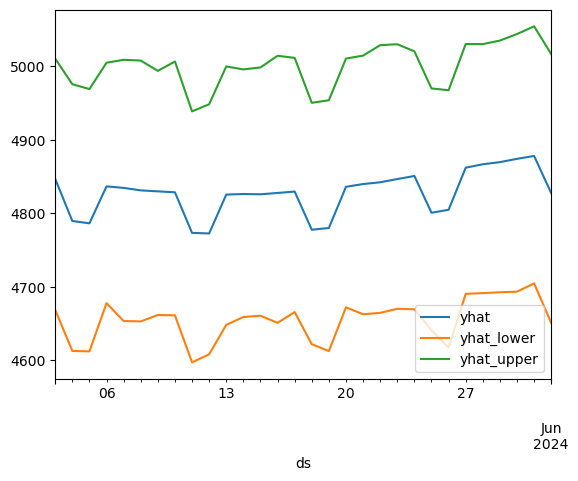

In [66]:
# Display forecasted data
sp500_forecast_indexed[['yhat', 'yhat_lower', 'yhat_upper']].iloc[2530:2560].plot()